In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
color_dict = {"genot": "#317d01",
    "otfm": "#a4fa6e",
    "CPA": "#6c0399",
    "id": "#8f97a8",}


In [16]:
model_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/otfm"

In [14]:
encoder_suffix= {"Class token": "", "Mean pooling": "_mean_pooling", "Attention seed": "_attention_seed"} 
#model_dirs = {"CPA": cpa_dir, "id": id_dir, "chemCPA": chemcpa_dir, "otfm": otfm_dir}#, "genot": genot_dir}

In [8]:
splits = [1,2,3,4]

# Decoded

In [27]:

all_dfs = []
for split in splits:
    dfs = {}
    for encoder, encoder_suff in encoder_suffix.items():
        metrics_file = f"ood_metrics_decoded_{split}{encoder_suff}.csv"
        dfs[encoder] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
        #dfs[model].loc["sinkhorn_div"] = dfs[model].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
        if "sinkhorn_div_1" in dfs[encoder].index:
            dfs[encoder] = dfs[encoder].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
        if "mmd_distance" in dfs[encoder].index:
            dfs[encoder] = dfs[encoder].drop(["mmd_distance"])
        if "mmd" in dfs[encoder].index:
            dfs[encoder] = dfs[encoder].drop(["mmd"])
        if "e_distance" in dfs[encoder].index:
            dfs[encoder] = dfs[encoder].drop(["e_distance"])
        dfs[encoder]["encoder"] = encoder
    result_df = pd.concat(dfs.values(), ignore_index=False)
    result_df["metric"] = result_df.index
    metrics = result_df["metric"].unique()
    df2 = pd.melt(result_df, id_vars=["encoder", "metric"])
    df2["split"] = split
    all_dfs.append(df2)

In [28]:
result_df

,Cediranib+PCI-34051,Givinostat+Crizotinib,Givinostat+SRT2104,Givinostat+Sorafenib,control+Givinostat,control+SRT2104,encoder,metric
r_squared,0.980108,0.991136,0.992742,0.912914,0.987423,0.973836,Class token,r_squared
r_squared,0.977967,0.993276,0.989345,0.924057,0.985686,0.941120,Mean pooling,r_squared
r_squared,0.981268,0.987959,0.992608,0.911192,0.988875,0.963785,Attention seed,r_squared


In [29]:
df_ood_metrics_decoded = pd.concat(all_dfs)


In [30]:
df_ood_metrics_decoded

,encoder,metric,variable,value,split
0,Class token,r_squared,Givinostat+Dasatinib,0.984970,1
1,Mean pooling,r_squared,Givinostat+Dasatinib,0.985591,1
2,Attention seed,r_squared,Givinostat+Dasatinib,0.939787,1
3,Class token,r_squared,Givinostat+SRT1720,0.991186,1
4,Mean pooling,r_squared,Givinostat+SRT1720,0.993434,1
...,...,...,...,...,...
13,Mean pooling,r_squared,control+Givinostat,0.985686,4
14,Attention seed,r_squared,control+Givinostat,0.988875,4
15,Class token,r_squared,control+SRT2104,0.973836,4
16,Mean pooling,r_squared,control+SRT2104,0.941120,4


In [31]:
df_ood_metrics_decoded.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/encoders_ood_metrics_decoded.csv")

In [32]:

all_dfs = []
for split in splits:
    dfs = {}
    for encoder, encoder_suff in encoder_suffix.items():
        metrics_file = f"ood_metrics_encoded_{split}{encoder_suff}.csv"
        dfs[encoder] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
        dfs[encoder].loc["sinkhorn_div"] = dfs[encoder].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
        dfs[encoder] = dfs[encoder].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
        dfs[encoder]["encoder"] = encoder
    result_df = pd.concat(dfs.values(), ignore_index=False)
    result_df["metric"] = result_df.index
    metrics = result_df["metric"].unique()
    df2 = pd.melt(result_df, id_vars=["encoder", "metric"])
    df2["split"] = split
    all_dfs.append(df2)

In [33]:
df_ood_metrics_encoded = pd.concat(all_dfs)


In [34]:
df_ood_metrics_encoded["metric"].value_counts()

metric
r_squared       81
e_distance      81
mmd             81
sinkhorn_div    81
Name: count, dtype: int64

In [35]:
df_ood_metrics_encoded.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/encoders_ood_metrics_encoded.csv")

In [36]:

all_dfs = []
for split in splits:
    dfs = {}
    for encoder, encoder_suff in encoder_suffix.items():
        metrics_file = f"ood_metrics_ood_{split}{encoder_suff}.csv"
        dfs[encoder] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
        dfs[encoder].loc["sinkhorn_div"] = dfs[encoder].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
        dfs[encoder] = dfs[encoder].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
        dfs[encoder]["encoder"] = encoder
    result_df = pd.concat(dfs.values(), ignore_index=False)
    result_df["metric"] = result_df.index
    metrics = result_df["metric"].unique()
    df2 = pd.melt(result_df, id_vars=["encoder", "metric"])
    df2["split"] = split
    all_dfs.append(df2)

In [37]:
df_ood_metrics_deg = pd.concat(all_dfs)


In [38]:
df_ood_metrics_deg

,encoder,metric,variable,value,split
0,Class token,r_squared,Givinostat+Dasatinib,0.980338,1
1,Class token,e_distance,Givinostat+Dasatinib,0.742102,1
2,Class token,mmd,Givinostat+Dasatinib,0.007943,1
3,Class token,sinkhorn_div,Givinostat+Dasatinib,3.630570,1
4,Mean pooling,r_squared,Givinostat+Dasatinib,0.978280,1
...,...,...,...,...,...
67,Mean pooling,sinkhorn_div,control+SRT2104,2.375564,4
68,Attention seed,r_squared,control+SRT2104,0.979609,4
69,Attention seed,e_distance,control+SRT2104,1.310798,4
70,Attention seed,mmd,control+SRT2104,0.010743,4


In [39]:
df_ood_metrics_deg.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/encoders_ood_metrics_deg.csv")

/tmp/ipykernel_473926/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/867311123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


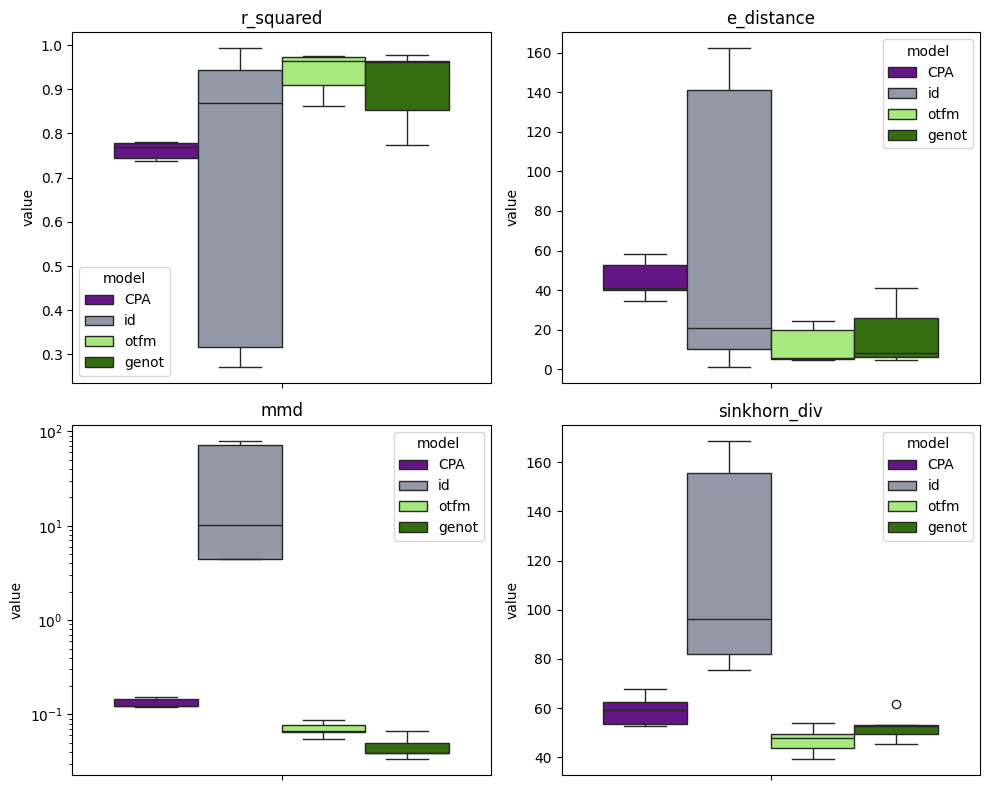

In [18]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    if metric == "mmd":
        axes[i].set_yscale("log")
    # Create the barplot
    sns.boxplot(subset, y="value", hue="model", ax=axes[i], palette=color_dict)
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_473926/3529327356.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_473926/3529327356.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/3529327356.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_473926/3529327356.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

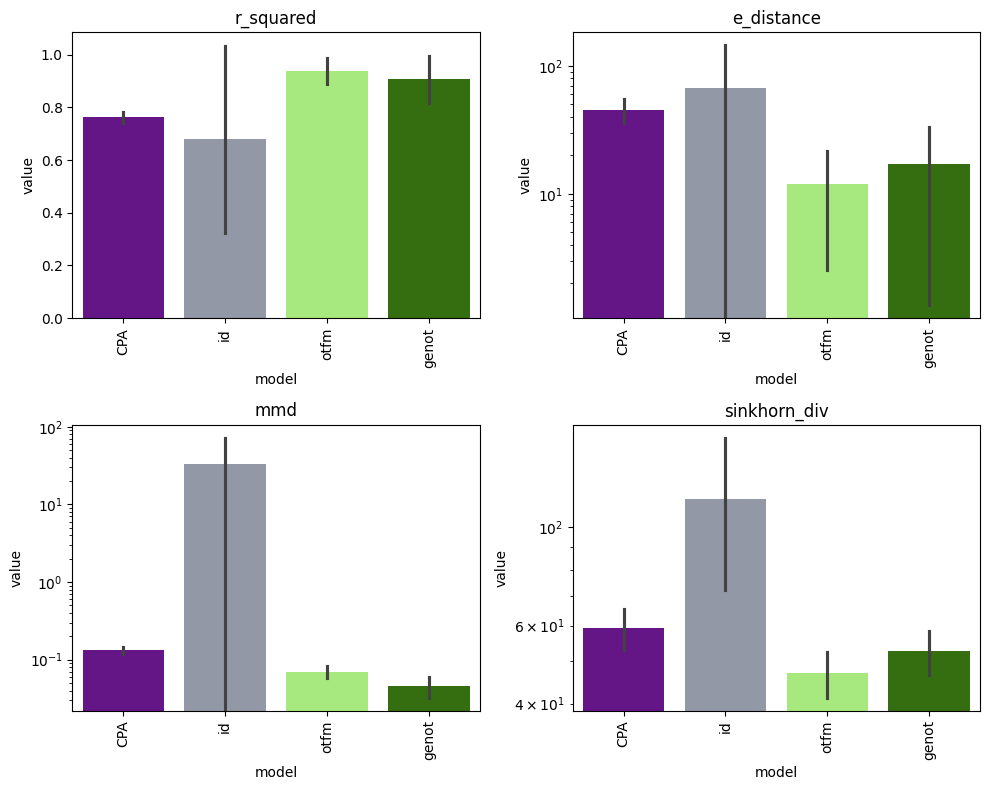

In [19]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    # Create the barplot
    sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
    if metric != "r_squared":
        axes[i].set_yscale("log")
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Encoded

In [10]:
metrics_file = "ood_metrics_encoded.csv"
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    dfs[model].loc["sinkhorn_div"] = dfs[model].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
    dfs[model] = dfs[model].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
    dfs[model]["model"] = model

In [11]:
result_df = pd.concat(dfs.values(), ignore_index=False)
result_df["metric"] = result_df.index
metrics = result_df["metric"].unique()
df2 = pd.melt(result_df, id_vars=["model", "metric"])

/tmp/ipykernel_473926/1841877669.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/1841877669.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/1841877669.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/1841877669.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


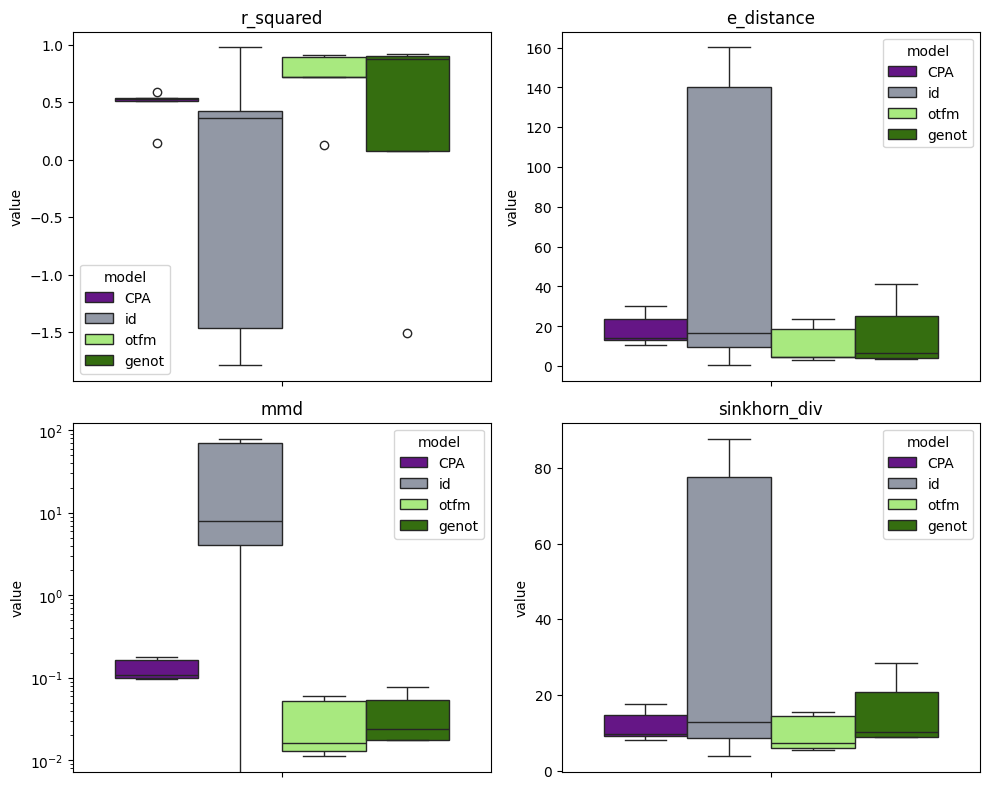

In [12]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    # Create the barplot
    sns.boxplot(subset, y="value", hue="model", ax=axes[i], palette=color_dict)
    if metric == "mmd":
        axes[i].set_yscale("log")
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 8))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    if metric == "mmd":
        axes[i].set_yscale("log")
    # Create the barplot
    sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_473926/2036134520.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_473926/2036134520.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_473926/2036134520.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subset, x="model", y="value", ax=axes[i],  palette=color_dict, errorbar="sd")
/tmp/ipykernel_473926/2036134520.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

OverflowError: cannot convert float infinity to integer

Error in callback <function _draw_all_if_interactive at 0x7fd83d8d56c0> (for post_execute):


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 1000x800 with 4 Axes>

# DEG

In [ ]:
metrics_file = "ood_metrics_deg.csv"
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    dfs[model].loc["sinkhorn_div"] = dfs[model].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
    dfs[model] = dfs[model].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
    dfs[model]["model"] = model